In [1]:
# Adds project root to sys.path so that `import src...` works in Jupyter
import _path


In [2]:
import pandas as pd

tracks_path = "../data/MSC01_tracks_clean.csv"
tracks = pd.read_csv(tracks_path)

tracks.head()


,cell_id,frame,t_min,x_um,y_um
0,0,10,200.0,39.867660,224.393768
1,0,11,220.0,34.776408,227.566565
2,0,12,240.0,31.056212,229.721570
3,0,13,260.0,32.449259,230.256018
4,0,14,280.0,33.368621,230.260754


In [3]:
tracks.shape, tracks.columns, tracks.dtypes


((474, 5),
 Index(['cell_id', 'frame', 't_min', 'x_um', 'y_um'], dtype='object'),
 cell_id      int64
 frame        int64
 t_min      float64
 x_um       float64
 y_um       float64
 dtype: object)

In [4]:
from src.steps import compute_steps_multi_tau, summary_by_tau


In [5]:
taus = [1, 2, 4]
steps_all = compute_steps_multi_tau(tracks, taus)

steps_all.head(), steps_all.shape


(   cell_id  frame_start  t_start_min  frame_end  t_end_min     dx_um  \
 0        0           10        200.0         11      220.0 -5.091252   
 1        0           11        220.0         12      240.0 -3.720196   
 2        0           12        240.0         13      260.0  1.393048   
 3        0           13        260.0         14      280.0  0.919362   
 4        1            0          0.0          1       20.0 -1.043849   
 
       dy_um  tau_frames  tau_min  
 0  3.172796           1     20.0  
 1  2.155006           1     20.0  
 2  0.534448           1     20.0  
 3  0.004737           1     20.0  
 4  0.011084           1     20.0  ,
 (1187, 9))

In [6]:
summary = summary_by_tau(steps_all)
summary


,tau_frames,n_steps,n_cells,median_tau_min
0,1,439,35,20.0
1,2,404,32,40.0
2,4,344,26,80.0


In [14]:
print(steps_all[["dx_um", "dy_um"]].describe())
steps_all.groupby("tau_frames")[["dx_um","dy_um"]].mean()


             dx_um        dy_um
count  1187.000000  1187.000000
mean     -0.910636    -0.337958
std       4.522866     4.922749
min     -24.842169   -34.010622
25%      -2.883082    -1.440636
50%      -0.725372     0.000000
75%       1.195453     1.292084
max      17.578750    19.435225


,dx_um,dy_um
tau_frames,,
1,-0.415209,-0.075137
2,-0.831101,-0.252589
4,-1.636289,-0.773619


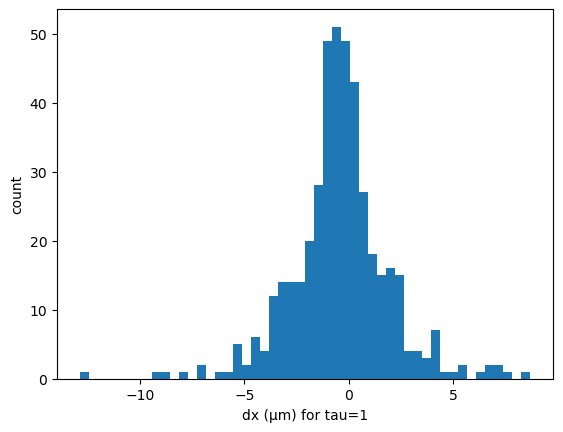

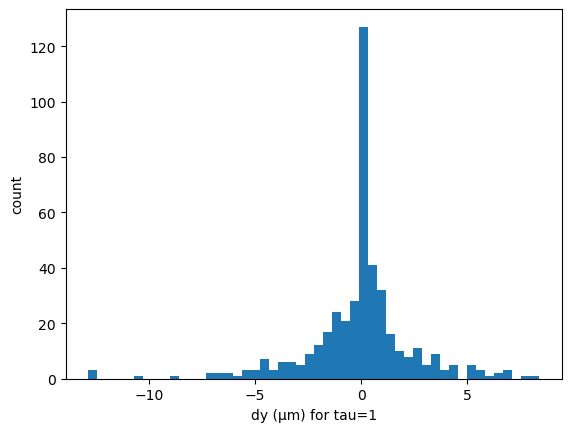

In [8]:
import matplotlib.pyplot as plt

s1 = steps_all[steps_all["tau_frames"] == 1]

plt.hist(s1["dx_um"], bins=50)
plt.xlabel("dx (µm) for tau=1")
plt.ylabel("count")
plt.show()

plt.hist(s1["dy_um"], bins=50)
plt.xlabel("dy (µm) for tau=1")
plt.ylabel("count")
plt.show()


In [9]:
out_path = "../data/MSC01_steps_tau124.csv"
steps_all.to_csv(out_path, index=False)

out_path


'../data/MSC01_steps_tau124.csv'

In [10]:
for tau in taus:
    s = steps_all[steps_all["tau_frames"] == tau].copy()
    s.to_csv(f"../data/MSC01_steps_tau{tau}.csv", index=False)


In [15]:
summary.to_csv("../data/MSC01_steps_summary_tau124.csv", index=False)
